In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image
import os

In [2]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
DIR = '../data/raw/TopDown/max/STD'
IMAGES = sorted(glob.glob(os.path.join(DIR, '*.tiff')), key=numericalSort)
IMAGES

['../data/raw/TopDown/max/STD\\max_variance_image_1.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_2.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_3.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_4.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_5.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_6.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_7.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_8.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_9.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_10.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_11.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_12.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_13.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_14.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_15.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image_16.tiff',
 '../data/raw/TopDown/max/STD\\max_variance_image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
# Assume image_stack is a NumPy array with shape (H, W, D)
# Example: image_stack = np.load('your_data.npy')  # shape: (H, W, D)
image_stack = []

for img_path in IMAGES:
    image_stack.append(Image.open(img_path))

# Visualizing feature distributions
plt.figure(figsize=(14, 8))
# for idx, img in enumerate(image_stack):
# plt.subplot(1, 1, 1 + 1)
sns.histplot(np.array(image_stack).reshape(-1, 1), kde=True)
plt.title(f'Distribution of Image # {1}')
# plt.tight_layout()
plt.show()

: 

In [ ]:
import numpy as np

def remove_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    # return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df[(df[column] <= lower_bound)]

In [ ]:
# mona = pd.DataFrame()

# mona['max_STD'] = data['max_STD']
# mona['depth_value'] = depth['depth_value'] 
# mona['x'] = depth['x'] 
# mona['y'] = depth['y'] 

In [ ]:
# outliers_max_std = remove_iqr_outliers(mona, 'max_STD')

# # print("Outliers in max_STD:", np.sum(outliers_max_std))
# outliers_max_std.head()

0.07121312375000005


,max_STD,depth_value,x,y
8617,0.070804,0.662430,8,425
43443,0.070275,1.411184,42,435
43444,0.054414,1.413549,42,436
43445,0.046840,1.415918,42,437
43446,0.056779,1.418289,42,438


,max_STD,depth_value,x,y
max_STD,1.000000,0.194917,-0.068125,0.151261
depth_value,0.194917,1.000000,0.001163,0.050385
x,-0.068125,0.001163,1.000000,-0.270629
y,0.151261,0.050385,-0.270629,1.000000


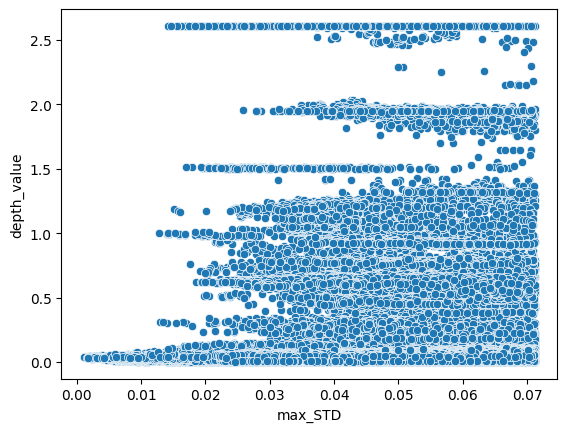

In [ ]:
# # data['log_max_STD'] = np.log1p(data['max_Spatial_STD'])
# # data['max_Spatial_STD'].hist()

# # mona = mona[(mona['max_STD'] >= 0.0)&(mona['max_STD'] <= 0.01)]
# # print(mona.head())

# # mona['depth_value'].hist()
# # from sklearn.preprocessing import StandardScaler
# # scaler = StandardScaler()
# # mona['max_STD'] = scaler.fit_transform(mona['max_STD'].values.reshape(-1, 1))

# sns.scatterplot(x=outliers_max_std['max_STD'], y=outliers_max_std['depth_value'])
# outliers_max_std.corr()
# # filtered_df['depth_value'].value_counts

In [ ]:
# import rasterio
# from rasterio.transform import from_origin
# from PIL import Image
 
# # Assumes columns: x, y, value
# x = outliers_max_std['x']
# y = outliers_max_std['y']
# values = outliers_max_std['depth_value']

# # === Step 2: Determine the image dimensions ===
# width = 1024
# height = 1024

# # Create an empty array (initialize with NaNs or zeros)
# image = np.full((int(height), int(width)), 0)  # or use np.zeros

# # === Step 3: Fill the image with your data ===
# for xi, yi, val in zip(x, y, values):
#     image[int(yi), int(xi)] = 255

# Image.fromarray(image).save('../out/output.png')

# print("Saved image as output.tif")

Saved image as output.tif


In [ ]:
# outliers_max_std.head()

,max_STD,depth_value,x,y
51646,0.006750,0.036020,50,446
52669,0.007155,0.037134,51,445
52670,0.004105,0.035296,51,446
53693,0.003162,0.036062,52,445
53694,0.002009,0.034226,52,446


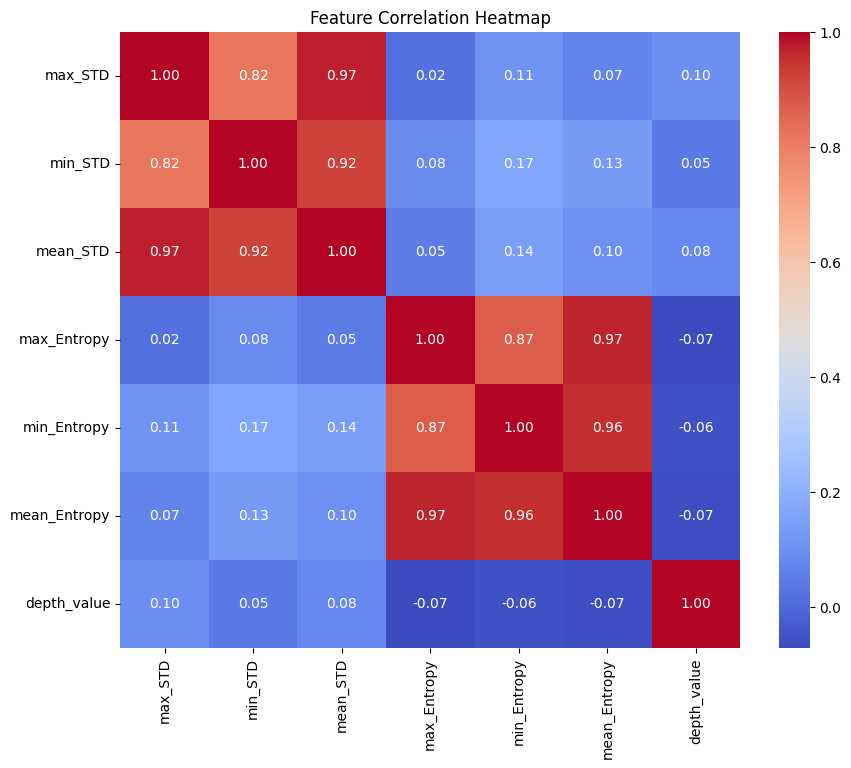

In [ ]:
# # Correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(combined_df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Feature Correlation Heatmap')
# plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LinearRegression

# # Feature importance analysis with Random Forest
# # X = combined_df[features[0:1], features[3:4]]
# # y = combined_df['depth_value']

# X = mona['max_STD']
# y = mona['depth_value']

# X= X.to_numpy().reshape(-1, 1)
# y= y.to_numpy()


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Feature scaling
# # scaler = StandardScaler()
# # scaler = MinMaxScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # Train MLP Regressor Model
# model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=2000, random_state=42)
# model.fit(X_train, y_train)

# # model = make_pipeline(
# #     PolynomialFeatures(100),
# #     LinearRegression()
# # )

# # # Fit the model
# # model.fit(X_train, y_train)

# # # Predict on test set
# # y_pred = model.predict(X_test)

# # Evaluate model
# predictions = model.predict(X_test)
# print("\nMLP Regression Evaluation:")
# print(f'RMSE: {mean_squared_error(y_test, predictions, squared=False):.4f}')
# print(f'MAE: {mean_absolute_error(y_test, predictions):.4f}')
# print(f'R^2 Score: {r2_score(y_test, predictions):.4f}')

# # # Visualization of predictions vs actual values
# # plt.figure(figsize=(8,6))
# # sns.scatterplot(x=y_test, y=predictions)
# # plt.xlabel('Actual Depth Values')
# # plt.ylabel('Predicted Depth Values')
# # plt.title('Actual vs Predicted Depth Values')
# # plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line
# # plt.show()

# # rf = RandomForestRegressor(
# #     n_estimators=100,
# #     max_depth=10,        # Limit tree depth
# #     min_samples_split=5, # Prevent overfitting
# #     random_state=42
# # )
# # rf.fit(X_train, y_train)

# # # Evaluate model
# # predictions = rf.predict(X_test)
# # print("\nRandom Forest Regression Evaluation:")
# # print(f'RMSE: {mean_squared_error(y_test, predictions, squared=False):.4f}')
# # print(f'MAE: {mean_absolute_error(y_test, predictions):.4f}')
# # print(f'R^2 Score: {r2_score(y_test, predictions):.4f}')

# # # Feature importance visualization
# # importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
# # importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# # plt.figure(figsize=(8, 6))
# # sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
# # plt.title('Feature Importance')
# # plt.show()


MLP Regression Evaluation:
RMSE: 0.0111
MAE: 0.0087
R^2 Score: -1.1095
